# 🎬 Proyecto (EDA):Análisis de Tendencias y Catálogo de Netflix (2008-2021)

## 📝 Descripción del Proyecto
Este proyecto consiste en un análisis exploratorio de datos (EDA) sobre el catálogo de títulos disponibles en **Netflix**. El objetivo es identificar patrones estratégicos en la plataforma, como la evolución de la duración de las películas, los géneros más populares y la distribución geográfica de su contenido.

## 🎯 Objetivos Principales
1.  **Limpieza de Datos:** Transformar formatos de texto a numeros para análisis estadístico.
2.  **Análisis Temporal:** Observar cómo ha cambiado el volumen de producción y la duración de las películas a través de los años.
3.  **Insights de Negocio:** Determinar qué tipo de contenido (Series vs. Películas) domina la plataforma.



## 📚 Importación de librerías

En esta sección se importan las librerías necesarias para el análisis exploratorio de datos.

- pandas: manipulación y análisis de datos
- numpy: operaciones numéricas
- matplotlib: visualización básica
- seaborn: visualizaciones estadísticas más avanzadas

In [1]:
# Importación de librerías para manejo de datos
import pandas as pd
import numpy as np

# Importación de librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración opcional para que los gráficos se vean más modernos
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

## 📥 Carga del dataset

Se carga el archivo netflix_titles.csv en un DataFrame de pandas para comenzar el análisis.

In [3]:
# Importación de archivos locales en entorno Colab

from google.colab import files
unploaded = files.upload()

# Carga del dataset
df = pd.read_csv('netflix_titles.csv')

# Inspección inicial
print("Primeras filas del dataset:")
display(df.head())


Saving netflix_titles.csv to netflix_titles (1).csv
Primeras filas del dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 🔎 Dimensiones del dataset

Se verifica el tamaño del dataset para conocer la cantidad de registros y variables disponibles.

In [4]:
df.shape

(8807, 12)

## 🔍 Verificación de valores nulos

Se analiza la presencia de valores faltantes en el dataset para determinar si será necesario aplicar técnicas de limpieza o imputación de datos.

In [5]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Se observan valores nulos en algunas variables del dataset.

Esto indica que el conjunto de datos está incompleto y requiere procesos adicionales de limpieza relacionados con valores faltantes que nos impiden hacer el análisis y de relleno donde la información es recuperable.

In [6]:
# 1. Rellenar valores nulos en columnas categóricas
# Usamos NumPy para identificar nulos y Pandas para reemplazarlos
df['director'] = df['director'].fillna('No Data')
df['cast'] = df['cast'].fillna('No Data')
df['country'] = df['country'].fillna('Unknown')

# 2. Eliminar filas con nulos en columnas críticas (donde hay muy pocos nulos)
# Si falta la fecha de estreno o el rating, es mejor no inventar el dato
df.dropna(subset=['date_added', 'rating'], inplace=True)

# 3. Verificamos que ya no queden nulos
print("Nulos restantes después de la limpieza:")
print(df.isnull().sum())

Nulos restantes después de la limpieza:
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        3
listed_in       0
description     0
dtype: int64


### Alcance
Columnas de texto (director, cast, country): Al usar 'No Data' o 'Unknown', evitamos perder el resto de la información de la fila, si borráramos cada película que no tiene director, perderíamos casi un tercio del dataset.

Columnas críticas (date_added, rating): Como son muy pocos los valores faltantes aquí, eliminarlos no afecta nuestras estadísticas y asegura que nuestros gráficos temporales sean precisos.

### Resultados
Después de ejecutar este código, el dataset quedo listo para ser trabajado, esto significa que cualquier función matemática o de visualización que apliquemos ahora no arrojará errores por valores vacíos.

## 🎯 Clasificación por Audiencia
En esta sección, analizaremos la columna rating, el objetivo es categorizar el contenido según la edad recomendada para identificar si Netflix se enfoca más en un público familiar o en contenido para adultos. Utilizaremos un gráfico de barras para visualizar las categorías más frecuentes.

/tmp/ipython-input-658705438.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=ratings_count.values, y=ratings_count.index, palette='coolwarm')


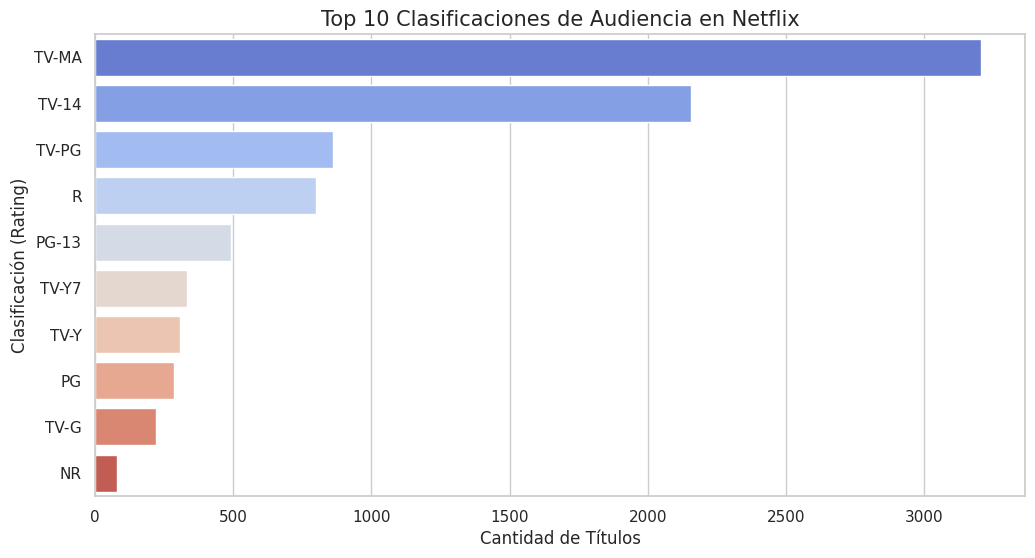

In [7]:
# 1. Contamos la frecuencia de cada clasificación (Rating)
ratings_count = df['rating'].value_counts().head(10)

# 2. Creamos la visualización
plt.figure(figsize=(12, 6))
sns.barplot(x=ratings_count.values, y=ratings_count.index, palette='coolwarm')

plt.title('Top 10 Clasificaciones de Audiencia en Netflix', fontsize=15)
plt.xlabel('Cantidad de Títulos')
plt.ylabel('Clasificación (Rating)')
plt.show()

Este gráfico permite identificar el segmento de mercado principal de la plataforma, por ejemplo, si predominan etiquetas como TV-MA (para adultos) o TV-PG (bajo supervisión), podemos concluir qué tan diversificado está su catálogo. Esto es un "insight" valioso porque explica el tono general del servicio de streaming.

### Clasificaciones para Series

✅TV-Y (All Children) Diseñado para niños muy pequeños (2-6 años)👶

✅TV-Y7 (Directed to Older Children) Para niños de 7 años en adelante ya que puede tener fantasía o violencia suave👦

✅TV-G (General Audience) Apto para todas las edades, contenido muy inofensivo👪

✅TV-PG (Parental Guidance) Se recomienda supervisión de los padres, ya que puede tener lenguaje o diálogos sugerentes👨‍👩‍👧

✅TV-14 (Parents Strongly Cautioned) Para mayores de 14 años, porque contiene temas más intensos o lenguaje fuerte⚠️

✅TV-MA (Mature Audience Only) El programa está diseñado específicamente para audiencias adultas🔞



### Clasificaciones para Películas

✅PG (Parental Guidance Suggested) Algunos contenidos pueden no ser adecuados para niños🤨

✅PG-13 (Parents Strongly Cautioned) No apto para menores de 13 años por violencia, desnudez o lenguaje fuerte🎞️

✅R (Restricted) Para mayores de 17 años, contenido adulto explícito🔞

✅NR (Not Rated) El contenido no ha sido clasificado formalmente aún. ❓

## 🎯 Análisis de Audiencia por País

Ahora que conocemos el significado de las etiquetas, vamos a cruzar esta información con la geografía, el objetivo es descubrir si ciertos países producen contenido más "familiar" mientras que otros se enfocan en contenido "adulto".

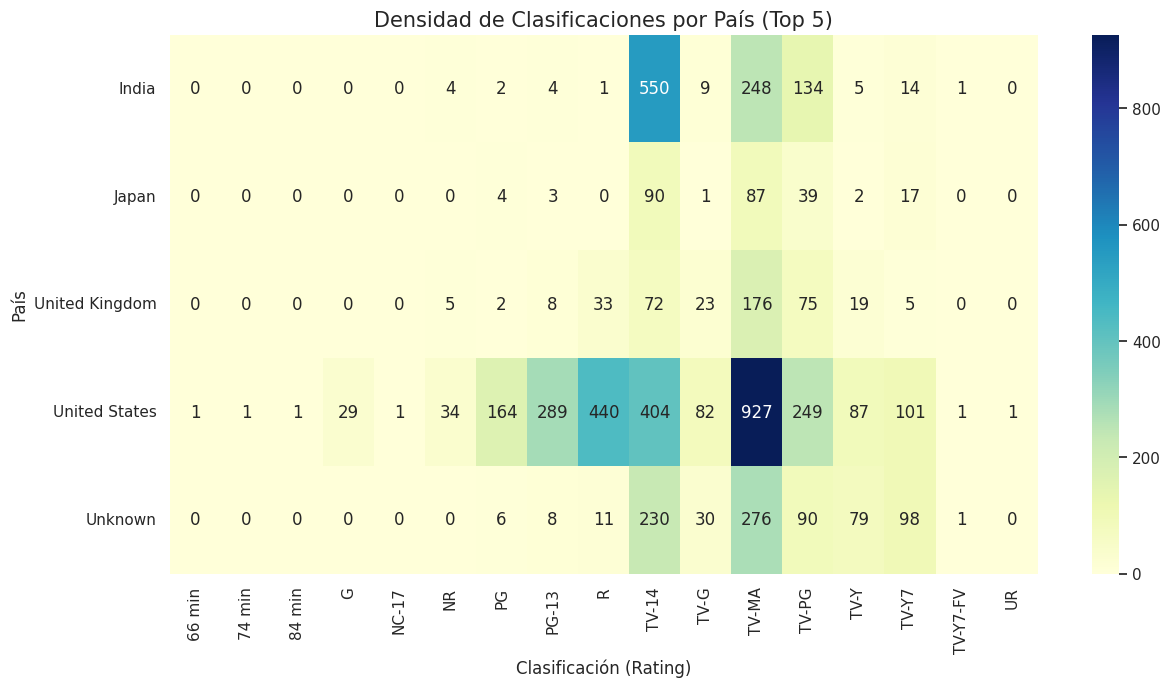

In [8]:
# 1. Filtramos los 5 países con más contenido para que el gráfico sea legible
top_countries = df['country'].value_counts().head(5).index
df_top_countries = df[df['country'].isin(top_countries)]

# 2. Creamos una tabla cruzada (Crosstab) de País vs Rating
# Usamos un mapa de calor (Heatmap) para ver la densidad
ct = pd.crosstab(df_top_countries['country'], df_top_countries['rating'])

plt.figure(figsize=(14, 7))
sns.heatmap(ct, annot=True, fmt='d', cmap='YlGnBu')

plt.title('Densidad de Clasificaciones por País (Top 5)', fontsize=15)
plt.xlabel('Clasificación (Rating)')
plt.ylabel('País')
plt.show()

Con este gráficologramos visualizar patrones de producción cultural, por ejemplo, podríamos notar que Estados Unidos lidera en contenido TV-MA, mientras que otros países quizás tengan una mayor proporción de TV-14.

## 🎯 Análisis de Dispersión de Duración por Género

El objetivo de este bloque es comparar cómo varía la duración de las películas según su categoría, no nos limitamos a ver el promedio, sino que utilizamos un Boxplot 📦 (Diagrama de Caja) para observar la distribución completa: dónde se concentra el 50% de las películas, cuáles son los valores mínimos y máximos, y si existen "outliers" (películas con duraciones inusuales para su género).

/tmp/ipython-input-1714910769.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_genres_dur, x='duration_num', y='listed_in', palette='Set2')


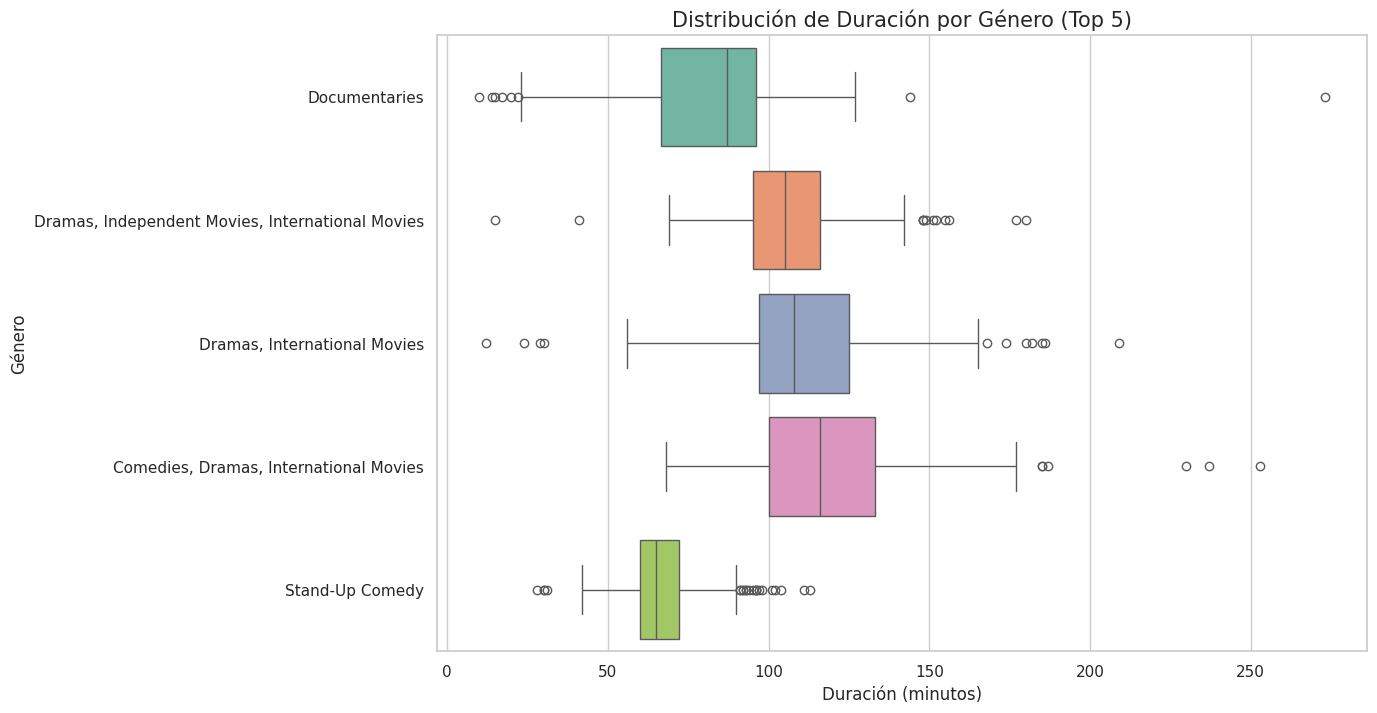

In [12]:
# 1. Creamos un subconjunto solo con películas
movies_df = df[df['type'] == 'Movie'].copy()

# 2. Transformamos la duración a formato numérico
movies_df['duration_num'] = movies_df['duration'].str.replace(' min', '').astype(float)

# 3. Seleccionamos los 5 géneros más comunes para comparar
top_genres = movies_df['listed_in'].value_counts().head(5).index
df_genres_dur = movies_df[movies_df['listed_in'].isin(top_genres)]

# 4. Creamos un gráfico de caja (Boxplot)
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_genres_dur, x='duration_num', y='listed_in', palette='Set2')

plt.title('Distribución de Duración por Género (Top 5)', fontsize=15)
plt.xlabel('Duración (minutos)')
plt.ylabel('Género')
plt.show()

Con este análisis, logramos extraer conclusiones estratégicas sobre el contenido de Netflix:

✔️Identificación de Estándares

Determinamos si géneros como los Documentales tienen una duración más estandarizada (cajas más estrechas) frente a los Dramas, que suelen ser más variados.

✔️Detección de Anomalías

Los puntos fuera de los "bigotes" del gráfico nos muestran películas que se salen de la norma, permitiéndonos investigar casos especiales de contenido extremadamente largo o corto.

✔️Calidad de Datos

Al realizar la conversión exitosa a float, garantizamos que nuestros cálculos matemáticos son precisos y están listos para modelos predictivos futuros.

## 🧠 Conclusiones Generales

Tras realizar este análisis exploratorio del catálogo de Netflix, podemos destacar tres pilares estratégicos de la plataforma:


✅Dominio del Contenido Adulto y Juvenil

La alta concentración de etiquetas TV-MA y TV-14 sugiere que el modelo de negocio de Netflix prioriza la retención de suscriptores adultos y adolescentes, ofreciendo narrativas complejas y maduras.

✅Estandarización por Género

Gracias al análisis de duración, observamos que Netflix mantiene estructuras narrativas consistentes, por ejemplo, los Documentales tienden a ser más compactos y directos, mientras que los Dramas permiten una mayor extensión para el desarrollo de personajes.

✅Globalización del Catálogo

Aunque Estados Unidos sigue siendo el principal motor, la presencia de múltiples países y la existencia de datos "Unknown" (que pudimos identificar y limpiar) demuestran una apuesta agresiva por contenido internacional para conquistar mercados locales.

*Fuente del dataset:*

Este conjunto de datos fue obtenido de la plataforma Kaggle.

Disponible en:https://www.kaggle.com/datasets/shivamb/netflix-shows